In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("Mall_Customers.csv")
df = dataset.copy()

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
#Searching if the dataset has null values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Now we do some exporatory analysis

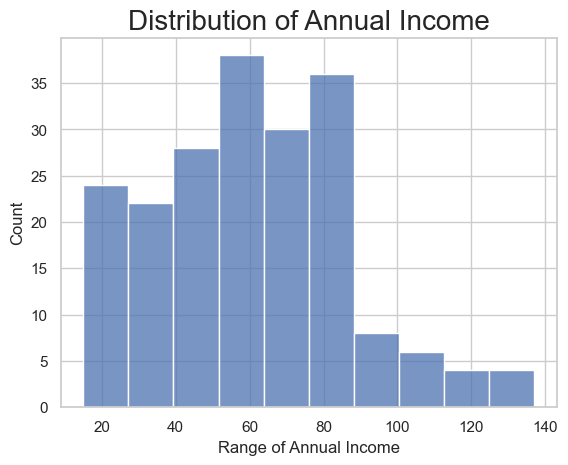

In [8]:
sns.set(style = 'whitegrid')
sns.histplot(df['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')
plt.show()

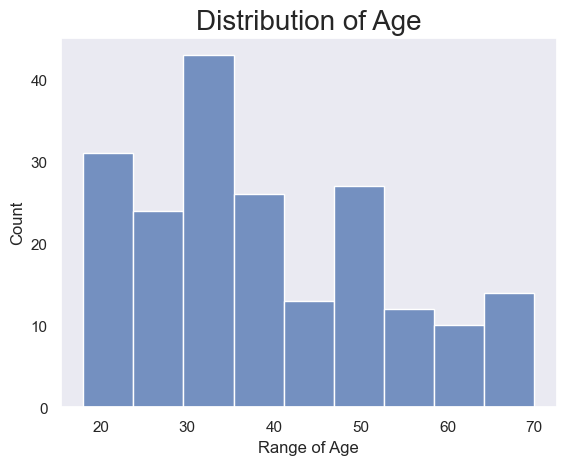

In [10]:
sns.set(style = 'dark')
sns.histplot(df['Age'])
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

## Unsupervised Learning

### Clustering

#### Clustering based on Spending score and Annual income 

In [11]:
#Making  the independent variables matrices
X = df.iloc[:, [3, 4]].values 

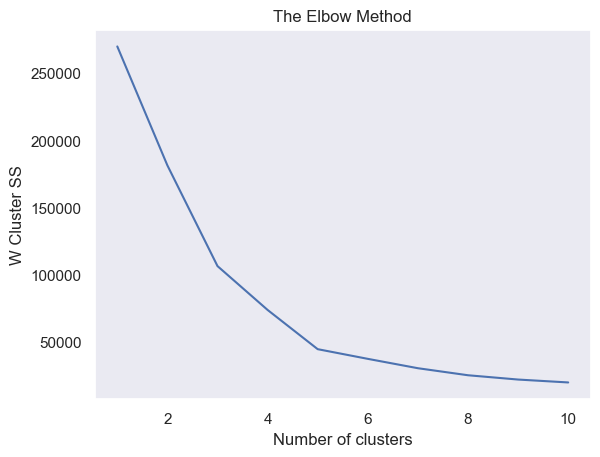

In [14]:
#Using KMeans for clustering
# Scale the features (important for K-means)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(X)


from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    df['Cluster'] = kmeans.fit_predict(features_scaled)





# font_title = {
#         'weight' : 'bold',
#         'size'   : 35}

# font_axes = {
#         'weight' : 'normal',
#         'size'   : 28}

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('W Cluster SS')
plt.show()

In [15]:
#Taking number of clusters = 5
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10)
y_kmeans = kmeans.fit_predict(X)
df['Cluster'] = kmeans.fit_predict(features_scaled)

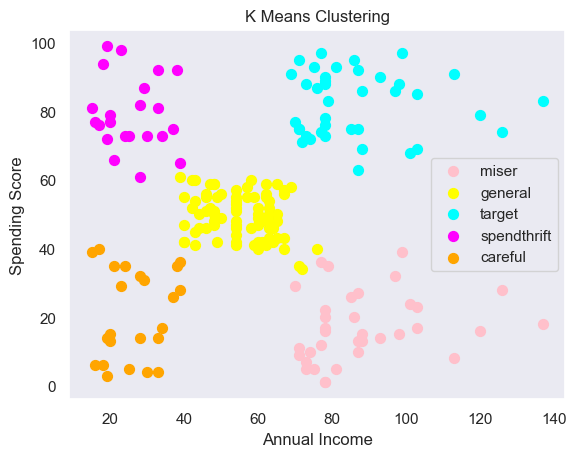

In [21]:
# PLotting the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'pink', label = 'miser')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'yellow', label = 'general')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'cyan', label = 'target')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'magenta', label = 'spendthrift')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = 'orange', label = 'careful')
#plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('K Means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

## Supervised Learning

### Linear Regression to predict spending score

In [44]:
# Example using Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [45]:
# Assuming 'df' is your DataFrame with cluster labels
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
y = df['Cluster']

In [46]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Create a linear regression model
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\Thorne\Desktop\Projects\csdraft\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
# Make predictions on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.925


In [49]:
# Evaluate the model
from sklearn.metrics import mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.15


In [50]:
# Save the model using joblib
from joblib import dump

# Assuming 'model' is your trained Linear Regression model
dump(model, 'spending_score_model.joblib')

['spending_score_model.joblib']

In [ ]:
# # Take user input for prediction
# user_age = int(input("Enter Age: "))
# user_annual_income = int(input("Enter Annual Income: "))
# user_gender = input("Enter Gender (Male/Female): ").capitalize()  # Convert to title case

# # Encode Gender as a numeric value (e.g., 1 for Male, 0 for Female)
# gender_encoding = 1 if user_gender == 'Male' else 0

# # Predict Spending Score using the trained model
# user_cluster = kmeans.predict([[user_annual_income, 0]])[0]  # Assuming user's Spending Score is unknown, set it to 0
# user_data = [[user_age, user_annual_income, gender_encoding]]
# predicted_spending_score = model.predict(user_data)[0]

# print(f"\nPredicted Spending Score: {predicted_spending_score}")

In [51]:
# from sklearn.metrics import accuracy_score
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy}')

In [54]:
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Assuming 'df' is your DataFrame with cluster labels
# Assuming 'model' is your trained Logistic Regression model

# Get user input for new customer features
new_age = float(input("Enter the customer's age: "))
new_annual_income = float(input("Enter the customer's annual income (k$): "))
new_spending_score = float(input("Enter the customer's spending score (1-100): "))

# Create a DataFrame with the user input
new_customer_features = pd.DataFrame({
    'Age': [new_age],
    'Annual Income (k$)': [new_annual_income],
    'Spending Score (1-100)': [new_spending_score]
})

# Make predictions for the new customer
predicted_cluster = model.predict(new_customer_features)

# Print the predicted cluster membership
print(f'Predicted Cluster Membership: {predicted_cluster[0]}')


Enter the customer's age:  17
Enter the customer's annual income (k$):  67
Enter the customer's spending score (1-100):  77


Predicted Cluster Membership: 0
